# Linear Regression + Ridge & Lasso Regression 

In [1]:
# Run the code cell below
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn import datasets, linear_model, preprocessing, model_selection

import sklearn.model_selection
from sklearn.model_selection import KFold
%matplotlib inline

# Data Import
Import the data from the file. Process data into dataframes and then into X,Y numpy arrays.

In [2]:

#df = pd.read_csv('/Users/Farhad_Ahmed/Desktop/ML intros/ML Project/HS_Regents_Sat_Scores_2015.csv')
df = pd.read_csv('HS_Regents_Sat_Scores_2015.csv')
#print(df)
#data = df.values

# extract all the columns that we need
df1=np.stack((df['Algebra2/Trigonometry'], df['English'], df['Geometry'],df['Global History and Geography'], df['Integrated Algebra'], df['Living Environment'], df['Physical Settings/Chemistry'], df['Physical Settings/Physics'], df['Average SAT Score (Total)'])).T

#remove any empty rows
df2=(df1[~np.isnan(df1).any(axis=1)])
#print(df2)
#print(df2.shape)

# df3 will be our feature matrix
df3 = df2[:,:8]
#print(df3)

# df4 will be the target vector
df4 = df2[:,8:]
#print(df4)

X = np.array(df3)
Y = np.array(df4)



    # Splitting Data Into Training And Test Set Using K-Fold. Do the next steps for each K-Fold Training and Test set

# Step 0: Fit a linear model and print the testset error. 

# Step 1: Ridge Regression
Fit a ridge model using linear_model.ridge(warm_start=True, fit_intercept = True). The alphas variable contaings 100 values of regularization parameter. Fit 100 models with these 100 different values of alphas and find test errors for all these 100 models and plot test error v/s alpha. 

# Step 2: Plotting Test Error v/s Alphas
Plot test errors v/s alphas in the code cell below.

# Step 3: Lasso Regression
Ffit a lasso model using linear_model.Lasso(warm_start=True, fit_intercept = True). 
The alphas variable contaings 200 values of the regularization parameter. 
Fit 200 models with these 200 different values of alphas and find test errors for all these 200 models and plot test error v/s alpha.

# Step 4: Plotting Test Error v/s Alphas
Plot test errors v/s alphas in the code cell below.

# Step 5. Display the coefficients


The test set error is:  6457.075420465331


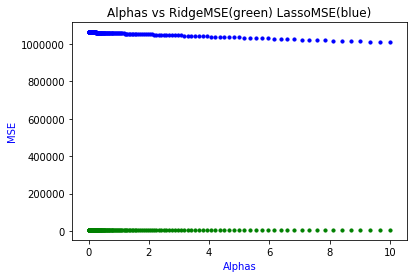

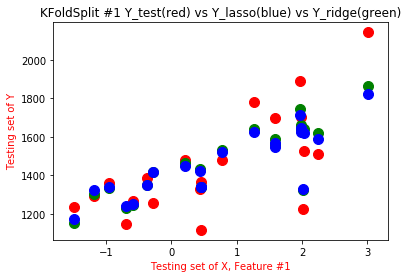

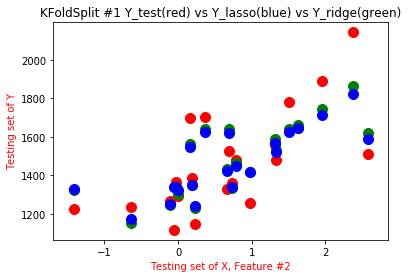

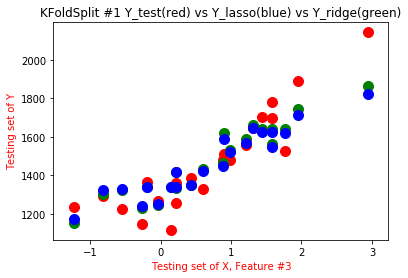

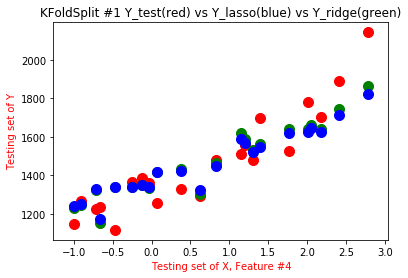

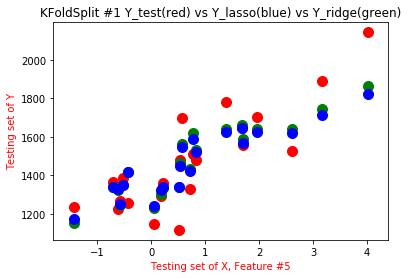

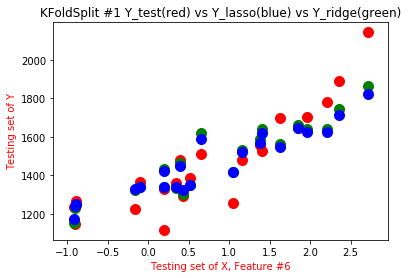

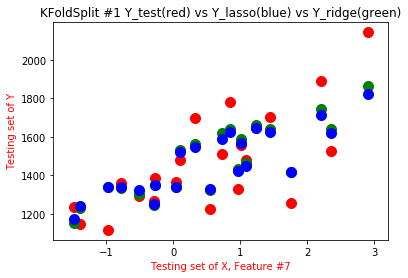

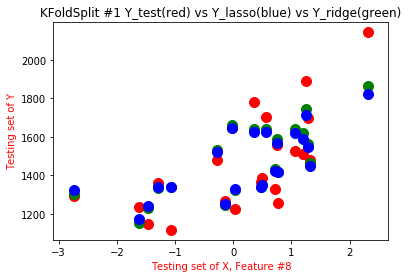

The number of non-zero coefficients is: 8
The Coefficients are: 
 [33.76401612 28.22672223 17.55986378 40.51917661  6.62269698 32.22840252
  8.71829481  1.33682675]
The test set error is:  6763.420098067418


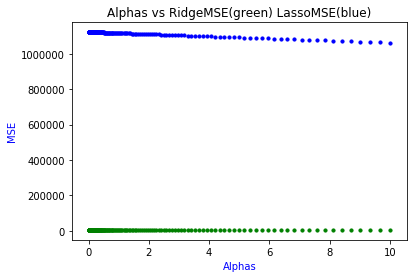

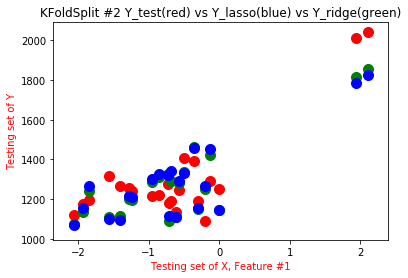

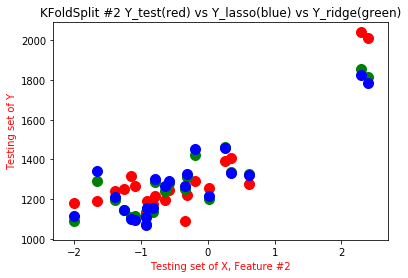

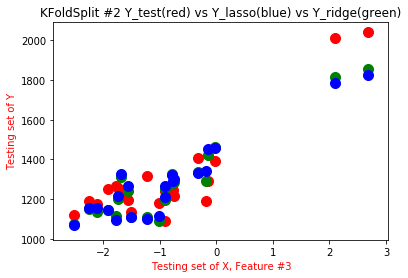

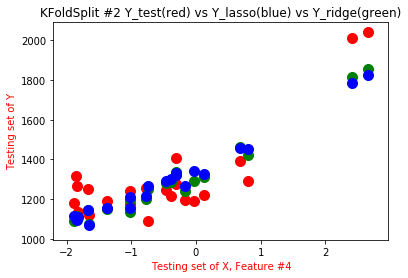

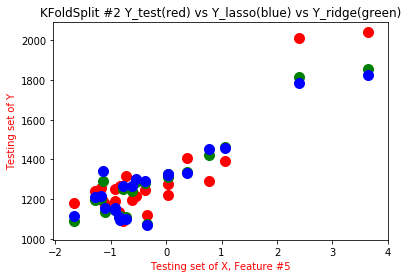

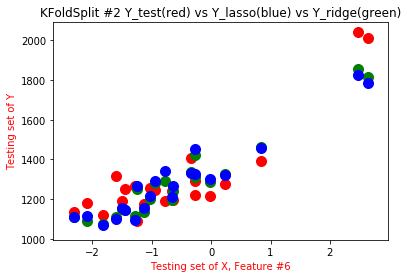

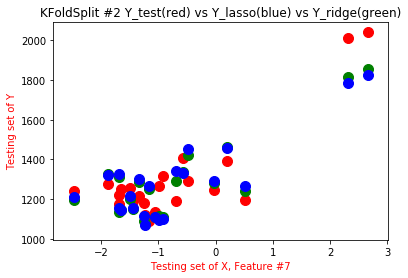

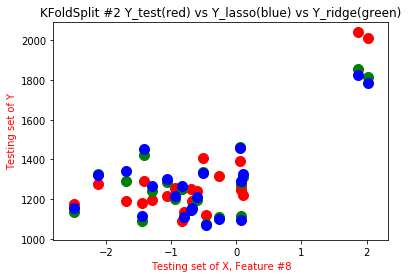

The number of non-zero coefficients is: 5
The Coefficients are: 
 [27.51485288  4.70860398 25.84193511 98.87191032  0.         15.3466332
  0.          0.        ]
The test set error is:  3891.3920363946086


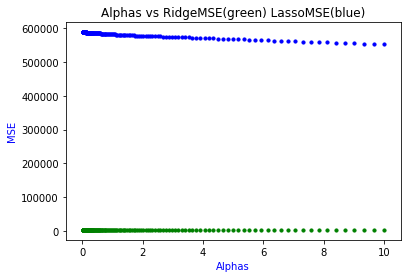

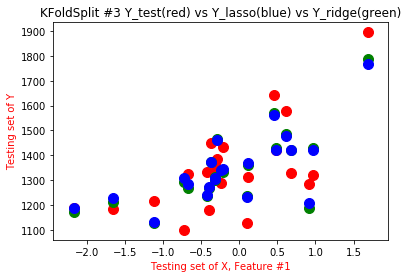

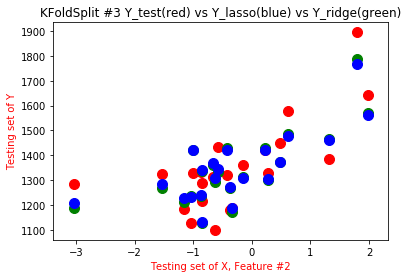

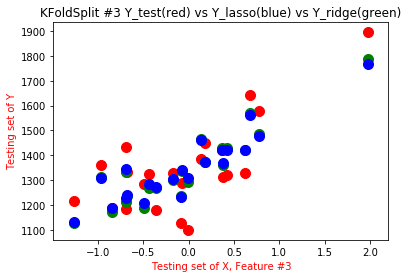

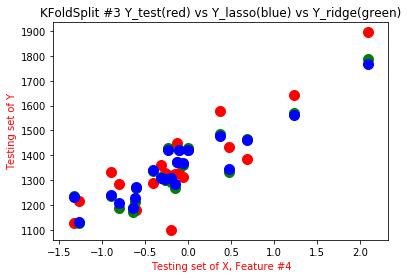

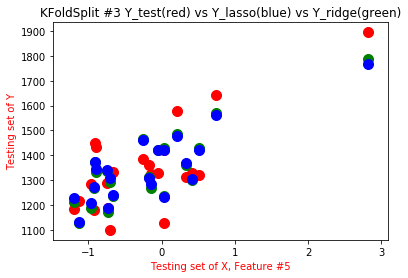

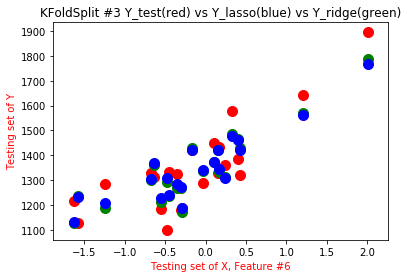

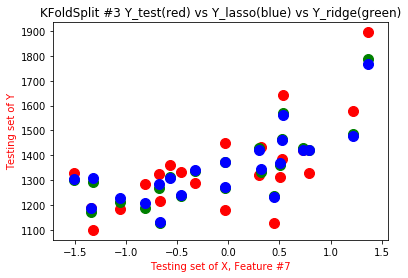

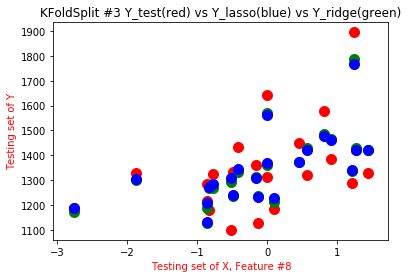

The number of non-zero coefficients is: 7
The Coefficients are: 
 [17.01404956 15.74334342 41.74303383 60.72176689 16.55498917 28.1504625
  0.         18.40390965]
The test set error is:  5510.549546842471


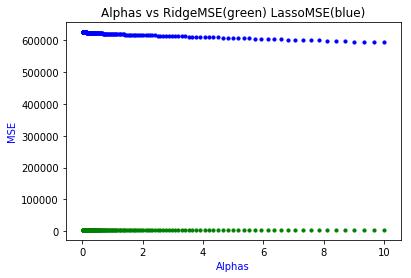

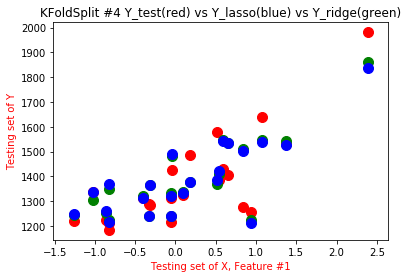

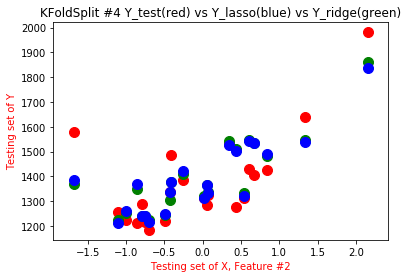

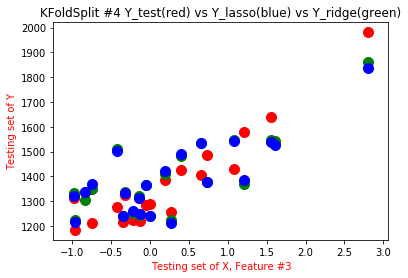

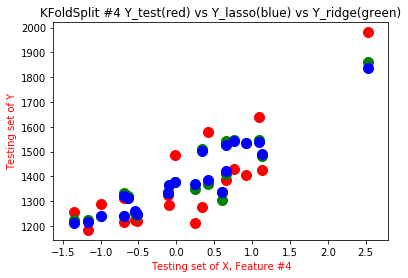

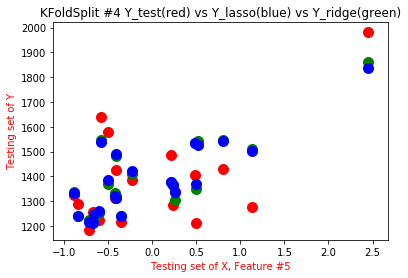

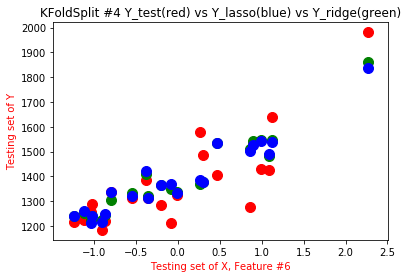

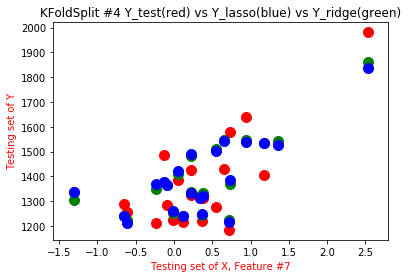

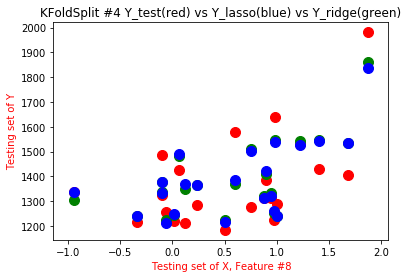

The number of non-zero coefficients is: 6
The Coefficients are: 
 [20.14012058 19.6502822   0.         68.52928295 31.48698412 35.80987587
  0.         25.57959409]
The test set error is:  7724.575669266937


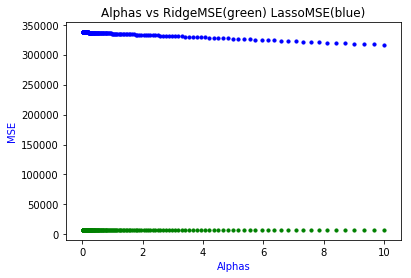

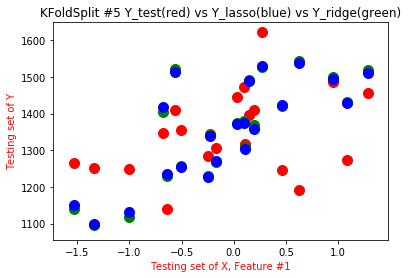

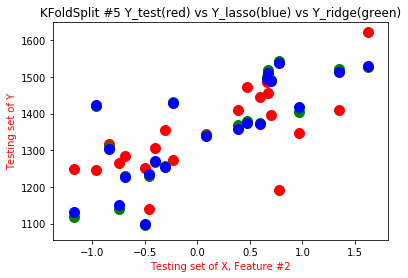

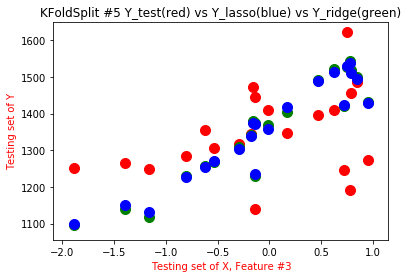

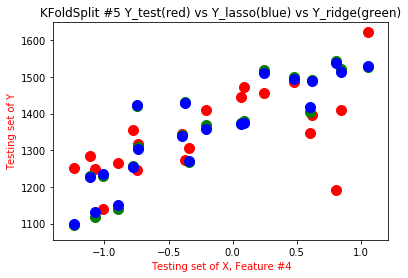

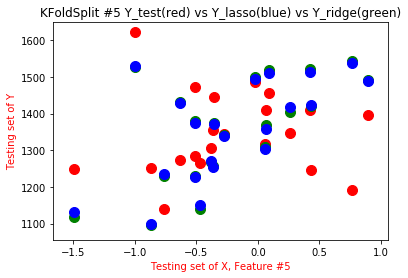

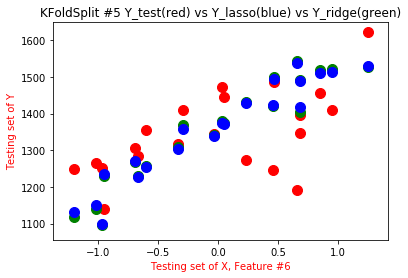

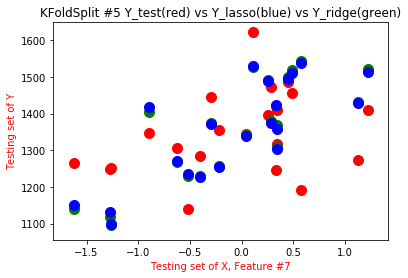

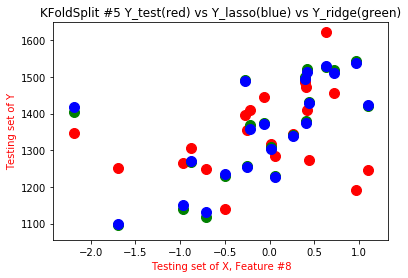

The number of non-zero coefficients is: 8
The Coefficients are: 
 [17.62584362 10.92909803 53.6050488  47.95866032 24.52144074 44.60558158
  0.71628295 13.74485555]


In [40]:
kf = KFold(n_splits=5)
splitCounter = 1
for train, test in kf.split(X):
    
    X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)                   # zero mean and unit variance
    X_test = scaler.transform(X_test)                     # 
    
    #fit Model
    lin_fit_model = linear_model.LinearRegression()
    lin_fit_model.fit(X_train, Y_train)

    #Calculate the  normalized MSE
    y_test_pred = lin_fit_model.predict(X_test)
    test_set_error = np.sum((y_test_pred - Y_test)**2) / (2*Y_test.shape[0]) 
    print("The test set error is: ", test_set_error)
    
    # Ridge Model
    model = linear_model.Ridge(fit_intercept = True, solver = 'sag')
    nalpha = 200
    alphas = np.logspace(-2,1,nalpha)

    ridge_error_array = []
    ridge_pred_dict = {}
    for x in range(nalpha):
        model.alpha = alphas[x]
        model.fit(X_train,Y_train)  
        pred = model.predict(X_test)
        error = np.sum((pred-Y_test)**2)/(2*Y_test.shape[0])
        ridge_error_array.append(error)
        ridge_pred_dict[error] = pred
         
    # Lasso Model
    model = linear_model.Lasso(warm_start=True, fit_intercept = True)
    nalpha = 200
    alphas = np.logspace(-2,1,nalpha)
    
    lasso_error_array = []
    lasso_pred_dict = {}
    for x in range(nalpha):
        model.alpha = alphas[x]
        model.fit(X_train,Y_train)
        pred = model.predict(X_test)
        error = np.sum((pred-Y_test)**2)/(2*Y_test.shape[0])
        lasso_error_array.append(error)
        lasso_pred_dict[error] = pred
    
    #plotting ridge, lasso   alphas vs MSE
    plt.scatter(alphas,ridge_error_array,color="green",s=10)
    plt.xlabel('Alphas',color="green")
    plt.ylabel('MSE',color="green")
    
    plt.scatter(alphas,lasso_error_array,color="blue",s=10)
    plt.xlabel('Alphas',color="blue")
    plt.ylabel('MSE',color="blue")
    
    plt.title("Alphas vs RidgeMSE(green) LassoMSE(blue)")
    plt.show()
     
    for feature in range(0,8):
        '''
        plt.scatter(X_train[:,feature],Y_train,color="blue")
        plt.title('KFoldSplit #' + str(splitCounter) + ' X_train vs Y_train')
        plt.xlabel('Training set of X, '+'Feature #' + str(feature+1),color="blue")
        plt.ylabel('Training set of Y',color="blue")
        plt.show()
        '''

        plt.scatter(X_test[:,feature],Y_test,color="red",s=100)
        plt.scatter(X_test[:,feature],ridge_pred_dict[min(ridge_pred_dict.keys())],color="green",s=100)
        plt.scatter(X_test[:,feature],lasso_pred_dict[min(lasso_pred_dict.keys())],color="blue",s=100)
        plt.title('KFoldSplit #' + str(splitCounter) + ' Y_test(red) vs Y_lasso(blue) vs Y_ridge(green)' )
        plt.xlabel('Testing set of X, '+'Feature #' + str(feature+1), color="red")
        plt.ylabel('Testing set of Y', color="red")
        plt.show()
    
    
    
    coefficients = model.coef_
    non_zeros = np.sum(coefficients != 0)
    print("The number of non-zero coefficients is:",str(non_zeros))
    print("The Coefficients are: \n",coefficients)
    
    splitCounter += 1